In [72]:
#load in necessary packages (taken from ca03)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
#!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

In [7]:
#read the dataset from the link provided 

df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

Section 1: Explore the Dataset

In [8]:
df.head(25)

hours_per_week_bin occupation_bin msr_bin  capital_gl_bin race_sex_bin  \
0           b. 31-40    b. Mid - Low   b. Mid     c. > 0        c. High     
1            a. 0-30         e. High  c. High     a. = 0        c. High     
2           b. 31-40          a. Low   b. Mid     a. = 0        c. High     
3           b. 31-40          a. Low  c. High     a. = 0         b. Mid     
4           b. 31-40         e. High  c. High     a. = 0         a. Low     
5           b. 31-40         e. High  c. High     a. = 0         b. Mid     
6            a. 0-30          a. Low   b. Mid     a. = 0         a. Low     
7   d. 41-50 & 61-70         e. High  c. High     a. = 0        c. High     
8   d. 41-50 & 61-70         e. High   b. Mid     c. > 0         b. Mid     
9           b. 31-40         e. High  c. High     c. > 0        c. High     
10         c. 71-100         e. High  c. High     a. = 0         b. Mid     
11          b. 31-40         e. High  c. High     a. = 0        c. High     
12           a. 0-30    b. Mid - Low   a. Low     a. = 0         b. Mid     
13  d. 41-50 & 61-70    c. Mid - Mid   b. Mid     a. = 0         b. Mid     
14          b. 31-40    c. Mid - Mid  c. High     a. = 0        c. High     
15  d. 41-50 & 61-70    c. Mid - Mid  c. High     a. = 0         b. Mid     
16          b. 31-40    b. Mid - Low   a. Low     a. = 0        c. High     
17          b. 31-40    b. Mid - Low   a. Low     a. = 0        c. High     
18  d. 41-50 & 61-70    c. Mid - Mid  c. High     a. = 0        c. High     
19  d. 41-50 & 61-70         e. High   b. Mid     a. = 0         b. Mid     
20          e. 51-60         e. High  c. High     a. = 0        c. High     
21           a. 0-30          a. Low   a. Low     a. = 0         a. Low     
22          b. 31-40    b. Mid - Low  c. High     a. = 0         b. Mid     
23          b. 31-40    c. Mid - Mid  c. High     b. < 0        c. High     
24          b. 31-40   d. Mid - High   b. Mid     a. = 0         b. Mid     

   education_num_bin education_bin workclass_bin      age_bin        flag   y  
0          c. 13      c. Bachelors    b. income    d. 36-40 & 56-60  train  0  
1          c. 13      c. Bachelors    b. income            e. 40-55  train  0  
2        b. 9-12            b. Mid    b. income    d. 36-40 & 56-60  train  0  
3         a. 0-8            a. Low    b. income            e. 40-55  train  0  
4          c. 13      c. Bachelors    b. income   b. 26-30 & 71-100  train  0  
5          d. 14        d. Masters    b. income    d. 36-40 & 56-60  train  0  
6         a. 0-8            a. Low    b. income            e. 40-55  train  0  
7        b. 9-12            b. Mid    b. income            e. 40-55  train  1  
8          d. 14        d. Masters    b. income    c. 31-35 & 61-70  train  1  
9          c. 13      c. Bachelors    b. income            e. 40-55  train  1  
10       b. 9-12            b. Mid    b. income    d. 36-40 & 56-60  train  1  
11         c. 13      c. Bachelors    b. income   b. 26-30 & 71-100  train  1  
12         c. 13      c. Bachelors    b. income             a. 0-25  train  0  
13       b. 9-12            b. Mid    b. income    c. 31-35 & 61-70  train  0  
14       b. 9-12            b. Mid    b. income    d. 36-40 & 56-60  train  1  
15        a. 0-8            a. Low    b. income    c. 31-35 & 61-70  train  0  
16       b. 9-12            b. Mid    b. income             a. 0-25  train  0  
17       b. 9-12            b. Mid    b. income    c. 31-35 & 61-70  train  0  
18        a. 0-8            a. Low    b. income    d. 36-40 & 56-60  train  0  
19         d. 14        d. Masters    b. income            e. 40-55  train  1  
20        e. 15+           e. High    b. income    d. 36-40 & 56-60  train  1  
21       b. 9-12            b. Mid    b. income            e. 40-55  train  0  
22        a. 0-8            a. Low    b. income    c. 31-35 & 61-70  train  0  
23        a. 0-8            a. Low    b. income            e. 40-55  train  0  


In [12]:
df.columns #column names for future reference

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [14]:
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [18]:
df.describe()

y     
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

Step 2: Reuse Preliminary Steps from CA03

In [20]:
df['flag'].unique()

array(['train', 'test'], dtype=object)

In [22]:
train_df = df[df.flag == 'train']
test_df = df[df.flag == 'test']

In [24]:
train_df = train_df.drop(columns = ['flag'])
test_df = test_df.drop(columns = ['flag'])

In [26]:
y_train = train_df['y']
y_test = test_df['y']
x_train = train_df.drop(columns = ['y'])
x_test = test_df.drop(columns = ['y'])

In CA03, we determined no further data cleaning was necessary due to no outliers or missing values being present in the dataset. In order to have a dataset that is effective for modeling, we need to encode any and all categorical variables. 

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in x_train.select_dtypes(include =['object']).columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])
    label_encoders[col]=le

In [47]:
x_train.dtypes

hours_per_week_bin    int64
occupation_bin        int64
msr_bin               int64
capital_gl_bin        int64
race_sex_bin          int64
education_num_bin     int64
education_bin         int64
workclass_bin         int64
age_bin               int64
dtype: object

In [49]:
x_test.dtypes

hours_per_week_bin    int64
occupation_bin        int64
msr_bin               int64
capital_gl_bin        int64
race_sex_bin          int64
education_num_bin     int64
education_bin         int64
workclass_bin         int64
age_bin               int64
dtype: object

Section 2: Finding Optimal Value of a Key Ensemble Method Hyperparameter

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options: 
    model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color = 'green', marker = 'o')
plt.plot()

In the example provided in the instructions, we see the code above build a line chart that plots the accuracy score of each of the max_depth hyperparameter values fed through the for loop. The reason why we can come to the conclusion that the hyperparameter value of 10 is the most accurate estimater hyperparameter for the example. 

We see that from max_depth option of 2-8, the slope of the line chart continues to trend positively, peaking at 10. At 10, the accuracy is the highest for the model, and then starts to dip as the further in depth we go, the more risk of underfitting the model shows. 

We will use this same template and analysis to build random forest models for the dataset, and provide our analysis. 

Section 3: Building a Random Forest Model

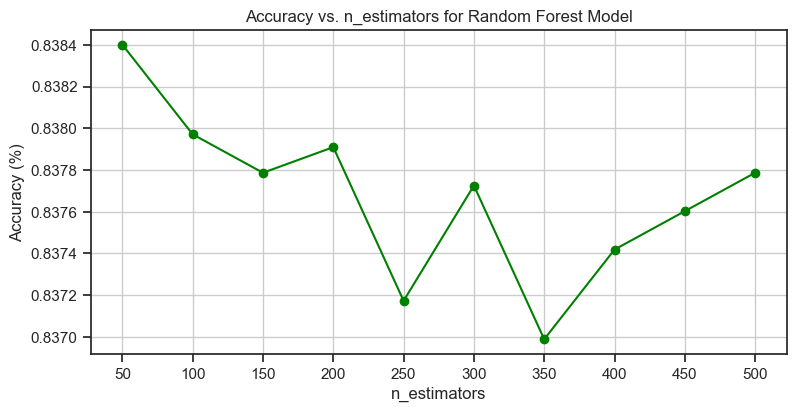

In [86]:
rf_accuracy_results = []
n_estimators_options = [50,100,150,200,250,300,350,400,450,500]

for values in n_estimators_options:
    rf_model = RandomForestClassifier(n_estimators = values, random_state=101)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracy_results.append(accuracy)

plt.figure(figsize=(8,4))
plt.plot(n_estimators_options, rf_accuracy_results, marker = 'o', color = 'green')
plt.title('Accuracy vs. n_estimators for Random Forest Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (%)')
plt.show()

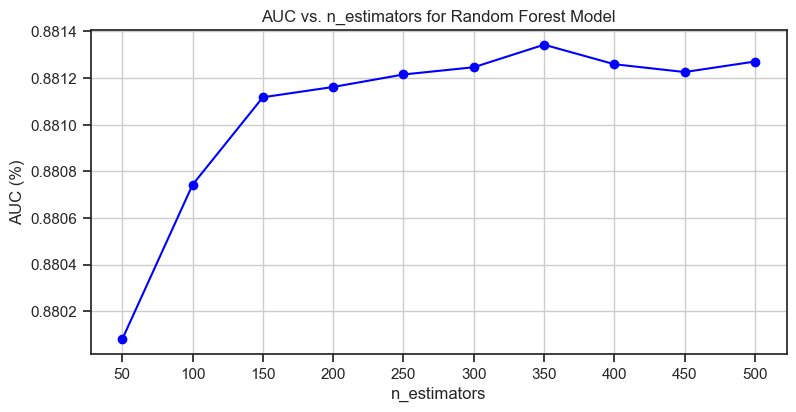

In [85]:
rf_auc_results = []
n_estimators_options = [50,100,150,200,250,300,350,400,450,500]

for values in n_estimators_options:
    rf_model = RandomForestClassifier(n_estimators = values, random_state=101)
    rf_model.fit(x_train, y_train)
    y_proba = rf_model.predict_proba(x_test)[:,1] # get probabilities for positive class
    auc = roc_auc_score(y_test, y_proba)
    rf_auc_results.append(auc)

plt.figure(figsize=(8,4))
plt.plot(n_estimators_options, rf_auc_results, marker = 'o', color = 'blue')
plt.title('AUC vs. n_estimators for Random Forest Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC (%)')
plt.show()

Question 1: For the trend in accuracy, overall, we observe some flunctuation in accuracy as the number of trees increases, but the general change in score is not incredibly significant across the hyperparameter tuning. There is an initial decrease in accuracy as we move from 50 to 200 trees, but start to observe stability and even an increase in accuracy as we move beyond 300. Regarding AUC, we see the strongest increase between 50 and 100 estimators. After 100 estimators, the AUC stablizes, with only some minor variations between 300 to 400 trees. 

Question 2: The optimal estimator for the accuracy score would be 50 estimators, since it is the most accurate value and also provides the fastest modeling due to the use of only 50 decision trees. Regarding AUC, the most optimal number of estimators was at 350, as there is a slight increase in the rate at that point, followed by a slight decline. This is the peak for the model. 

Section 4: Building AdaBoost, Gradient Boost, and XGB

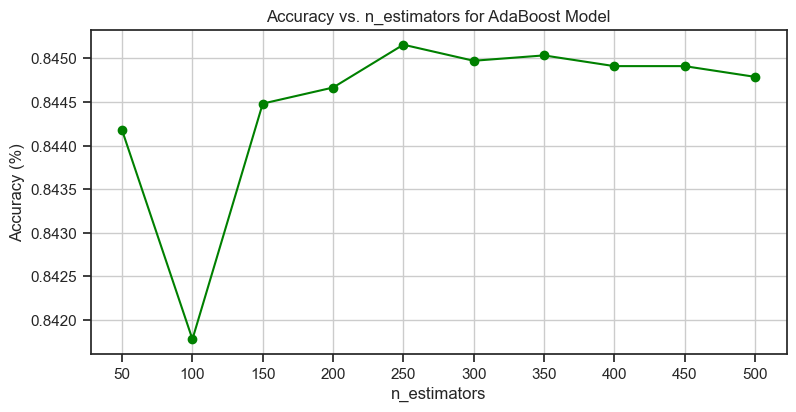

In [94]:
from sklearn.ensemble import AdaBoostClassifier

ada_accuracy_results = []
n_estimators_options = [50,100,150,200,250,300,350,400,450,500]

for values in n_estimators_options:
    ada_model = AdaBoostClassifier(n_estimators = values, random_state = 101)
    ada_model.fit(x_train, y_train)
    y_pred = ada_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    ada_accuracy_results.append(accuracy)

plt.figure(figsize=(8,4))
plt.plot(n_estimators_options, ada_accuracy_results, marker = 'o', color = 'green')
plt.title('Accuracy vs. n_estimators for AdaBoost Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (%)')
plt.show()

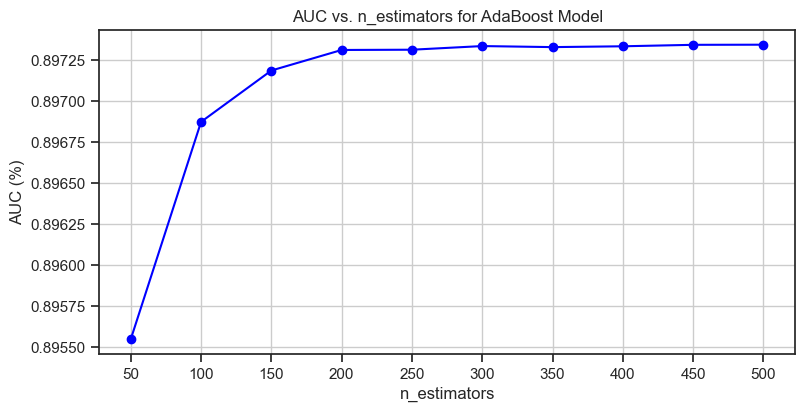

In [97]:
ada_auc_results = []

for values in n_estimators_options:
    ada_model = AdaBoostClassifier(n_estimators=values, random_state=101)
    ada_model.fit(x_train, y_train)
    y_proba = ada_model.predict_proba(x_test)[:, 1] 
    auc = roc_auc_score(y_test, y_proba)
    ada_auc_results.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, ada_auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators for AdaBoost Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC (%)')
plt.show()

Question 1: For the accuracy score, we see strong variation in the accuracy rate for the ADA boost model. There is a large dip that occurs at 100 trees, but then the rest of the model stablizes after 200 trees are used. For the AUC curve, the strongest increase occurs between 50 and 100 estimators, and after that, stabilizes with little to no variations after that. Although hard to visualize on the graph, it seems the peak for the AUC surve is at around 200 trees. 

Question 2: The optimal value for the accuracy score would be 250 trees, which is the sharpest peak on the chart. After the estimator of 200, the rest of the model flunctuates in more of a downward slope. For the AUC, the peak seems to occur at around 200 estimators, especially considering that for the rest of the estimators higher than that the change in AUC is incredibly small. There is no noticeable changes in estimators greater than 250, other than increasing potential for overfitting and training time, thus making 200 the optimal number. 

Next, we will do Gradient Boosting. 

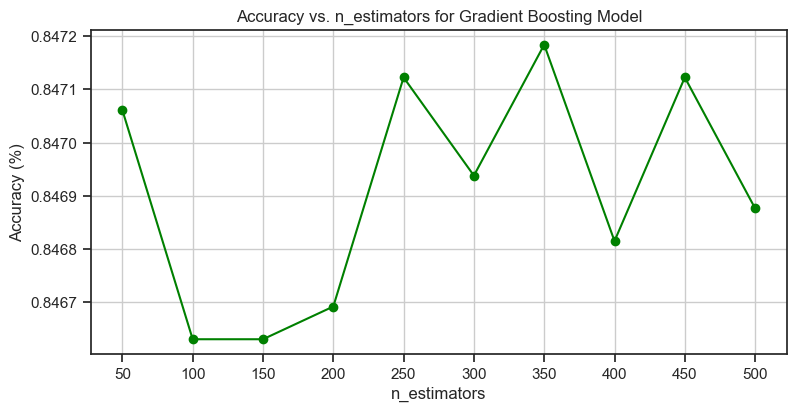

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb_accuracy_results = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for values in n_estimators_options:
    gb_model = GradientBoostingClassifier(n_estimators=values, random_state=101)
    gb_model.fit(x_train, y_train)
    y_pred = gb_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    gb_accuracy_results.append(accuracy)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, gb_accuracy_results, marker='o', color='green')
plt.title('Accuracy vs. n_estimators for Gradient Boosting Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (%)')
plt.show()

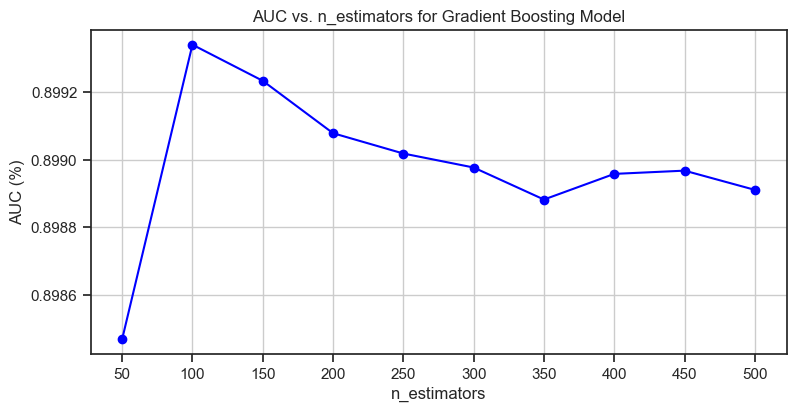

In [106]:
gb_auc_results = []

for values in n_estimators_options:
    gb_model = GradientBoostingClassifier(n_estimators=values, random_state=101)
    gb_model.fit(x_train, y_train)
    y_proba = gb_model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    gb_auc_results.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, gb_auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators for Gradient Boosting Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC (%)')
plt.show()

Question 1: THe accuracy score has many variation throughout the range of estimators. It starts at a high rate of accuracy at 50, but drops down throughout 100-150 estimators. Starting at the accuracy rate of 200, we start working up, until we hit two peaks at 250 and 350. At both of these rates, accuracy is the highest, but varies up and down in between significantly. For the AUC curve, we once again, see a strong increase between 50 and 100 trees. however, after the use of 100 estimaters, we see a constant trend downwards. The trend dips at 350, before having a slight increase after that point. This trend suggests that the use of over 100 estimators may be leading to some overfitting in the model. 

Question 2: The optimal value for accuracy in this model would be at 350, since it is the peak where accuracy is the absolute highest. Others to take into consideration, should the risk of overfitting be too high at this rate, would be 250 and 50, since they are also high peaks that occur at a lower rate of estimators. Further, for AUC, the highest rate is 100 for the number of trees. After the rate of 100, we see a strong decline in the AUC rate. 

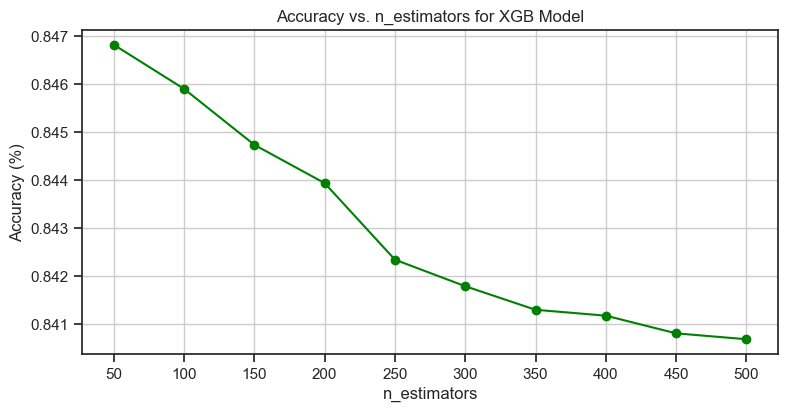

In [103]:
from xgboost import XGBClassifier

xgb_accuracy_results = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for values in n_estimators_options:
    xgb_model = XGBClassifier(n_estimators=values, random_state=101, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    xgb_accuracy_results.append(accuracy)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, xgb_accuracy_results, marker='o', color='green')
plt.title('Accuracy vs. n_estimators for XGB Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (%)')
plt.show()

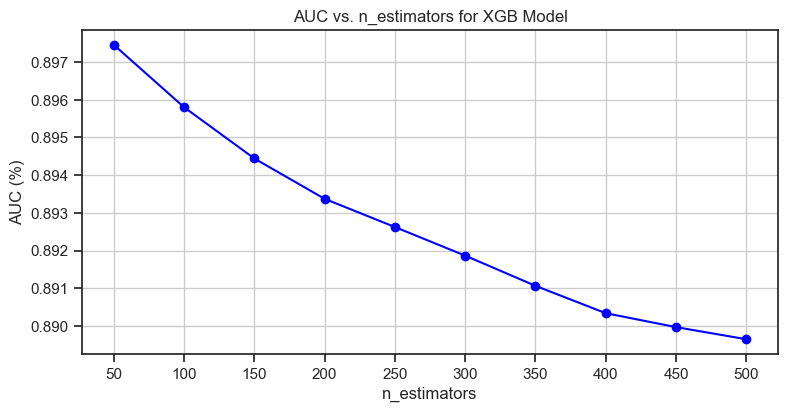

In [110]:
xgb_auc_results = []

for values in n_estimators_options:
    xgb_model = XGBClassifier(n_estimators=values, random_state=101, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(x_train, y_train)
    y_proba = xgb_model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    xgb_auc_results.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators_options, xgb_auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators for XGB Model')
plt.xticks(n_estimators_options)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC (%)')
plt.show()

Question 1: For the XGB model, we see that the model starts off pretty strong at 50 estimaros. After 50, there is a strong decline in accuracy. This means that the model becomes less accurate, or more prone to overfitting, as we increase this hyperparameter. For the AUC trends, we observed a similar trend in the percentage. We start strong at 50 trees, but as we add more trees, we see less benefit. The predictive power of the model is stronger with less trees. 

Question 2: The optimal number of estimators for both the accuracy and AUC rate of this model is both 50, since any value greater than that would lead to an inaccurate and overfitted model for the dataset. 

Section 5: Compare Performance

In [114]:
optimal_estimators = {
    'Random Forest': [50,350],
    'AdaBoost': [250,200],
    'Gradient Boost': [350,100],
    'XGB': [50,50]}

performance_data = {
    'Metric': ['Accuracy', 'AUC'],
    'Random Forest': optimal_estimators['Random Forest'],
    'AdaBoost': optimal_estimators['AdaBoost'],
    'Gradient Boost': optimal_estimators['Gradient Boost'],
    'XGB': optimal_estimators['XGB']
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

    Metric   Random Forest  AdaBoost  Gradient Boost  XGB
0  Accuracy        50          250          350       50 
1       AUC       350          200          100       50 
